**Problem Statement**
* NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
* The dataset used in this project is originally from NIDDK. 

**Objective**
* To predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
* Build a model to accurately predict whether the patients in the dataset have diabetes or not.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import seaborn as sns  
from collections import Counter
%matplotlib inline
from sklearn.model_selection import train_test_split

**Approach :**

*Following pointers will be helpful to structure the findings for this problem.   

1.	Perform descriptive analysis. It is very important to understand the variables and corresponding values. We need to think through - Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value.
•	Glucose
•	BloodPressure
•	SkinThickness
•	Insulin
•	BMI

      How will you treat these values?

2.	Visually explore these variable, you may need to look for the distribution of these variables using histograms. Treat the missing values accordingly.

3.	 We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 


4.	Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

5.	Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

6.	Perform correlation analysis. Visually explore it using a heat map.

(Note: Do not focus on visualization aspects when working with SAS)

7.	Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?

(Note: if you are working with SAS, ignore this question and perform stratified sampling to partition the data. Create strata of age for this.)

8.	Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.

(Note: if you are working with SAS, ignore this question. Apply logistic regression technique to build the model.)

9.	Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

10.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following: 

a)	Pie chart to describe the diabetic/non-diabetic population
b)	Scatter charts between relevant variables to analyse the relationships
c)	Histogram/frequency charts to analyse the distribution of the data
d)	Heatmap of correlation analysis among the relevant variables
e)	Create bins of Age values – 20-25, 25-30, 30-35 etc. and analyse different variables for these age brackets using a bubble chart. 




In [2]:
data = pd.read_csv('health care diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Data.info shows that there is no null value in the data. 6 columns are integer types and 2 are float64 types.

In [6]:
# To confirm the above info about null values-

data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
data[['Outcome']].nunique()

Outcome    2
dtype: int64

In [9]:
data[data['Outcome'] == 1].shape

(268, 9)

In [10]:
Counter(data['Outcome'])

Counter({1: 268, 0: 500})

### In Outcome column, 268 cases were positive (diabetic) and 500 were negative(not diabetic)

### Looking for zero values (if any) in the variables other than Outcome

In [11]:
data[data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']]==0].count()
# data[data.columns[:8]]==0 --> will give true, fasle values
# data[(data[data.columns[:8]]==0).any(axis=1)] ---> will show the 0 values
# data1 = data[~(data[data.columns[:8]]==0).any(axis=1)]
# data1.head()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
data[data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']]==0].count()/len(data)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

#### Counting zeros in individual columns using counter

In [13]:
Counter(data['Glucose']==0)

Counter({False: 763, True: 5})

In [14]:
Counter(data['BloodPressure']==0)

Counter({False: 733, True: 35})

In [15]:
Counter(data['SkinThickness']==0)

Counter({False: 541, True: 227})

In [16]:
Counter(data['Insulin']==0)

Counter({True: 374, False: 394})

In [17]:
Counter(data['BMI']==0)

Counter({False: 757, True: 11})

### From the above few lines of code, it is clear that columns 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI' have 0 values which indicates missing values. So we need to treat them for further analysis

## Exploring the variables using Histogram

In [18]:
data['Glucose'].value_counts().head(10)

99     17
100    17
111    14
129    14
125    14
106    14
112    13
108    13
95     13
105    13
Name: Glucose, dtype: int64

Text(0.5, 1.0, 'Histogram- Glucose')

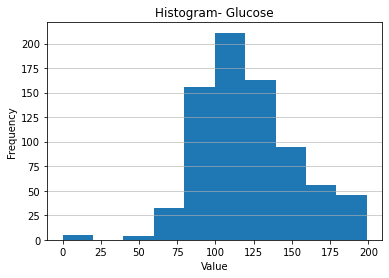

In [19]:
# plt.hist(data['Glucose'])
plt.hist(data['Glucose'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram- Glucose')


Text(0.5, 1.0, 'Histogram- Blood Pressure')

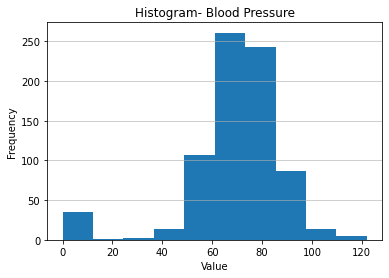

In [20]:
plt.hist(data['BloodPressure'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram- Blood Pressure')

Text(0.5, 1.0, 'Histogram- Skin Thickness')

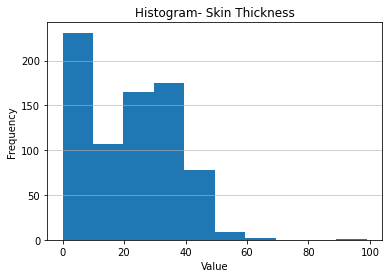

In [21]:
plt.hist(data['SkinThickness'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram- Skin Thickness')

Text(0.5, 1.0, 'Histogram- Insulin')

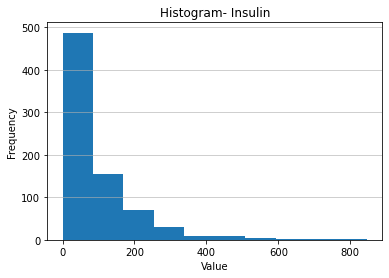

In [22]:
plt.hist(data['Insulin'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram- Insulin')

Text(0.5, 1.0, 'Histogram- BMI')

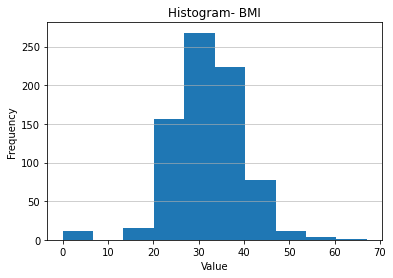

In [23]:
plt.hist(data['BMI'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram- BMI')

### From above histograms, it is clear that Insulin has highly skewed data distribution, whereas the remaining 4 variables ('Glucose', 'BloodPressure', 'SkinThickness', 'BMI') have relatively balanced data distribution therefore we will treat missing values in these 5 variables accordingly
### * Glucose, BloodPressure, SkinThickness, BMI - replace missing values with mean
### * Insulin - replace missing values with median

In [24]:
data['Insulin'].median() # 30.5

30.5

In [25]:
data[data['Insulin']!=0]['Insulin'].median()

125.0

In [26]:
data.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [27]:
data[data!=0].mean()

Pregnancies                   4.494673
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       1.000000
dtype: float64

### Since the mean and median of the variables with zero values and after removing zeros is different, so we would proceed by first converting these zeroes into na's and then replacing these na values with mean or median

### Treating zeros in the 5 columns
### 1. Convert Zeros into na

In [28]:
cols_with_zero_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_zero_values] = data[cols_with_zero_values].replace(0, np.NaN)

In [29]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### 2. Replacing na values with mean and median

In [30]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
imp_median = SimpleImputer(strategy='median')

In [31]:
data['Glucose'] = imp_mean.fit_transform(data[['Glucose']])
imp_mean.statistics_

array([121.68676278])

In [32]:
data['BloodPressure'] = imp_mean.fit_transform(data[['BloodPressure']])
imp_mean.statistics_

array([72.40518417])

In [33]:
data['SkinThickness'] = imp_mean.fit_transform(data[['SkinThickness']])
imp_mean.statistics_

array([29.15341959])

In [34]:
data['BMI']= imp_mean.fit_transform(data[['BMI']])
imp_mean.statistics_

array([32.45746367])

In [35]:
data['Insulin'] = imp_median.fit_transform(data[['Insulin']])
imp_median.statistics_

array([125.])

In [36]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


### A count (frequency) plot describing the data types and the count of variables

In [39]:
data.dtypes.value_counts()

float64    6
int64      3
dtype: int64

<AxesSubplot:ylabel='count'>

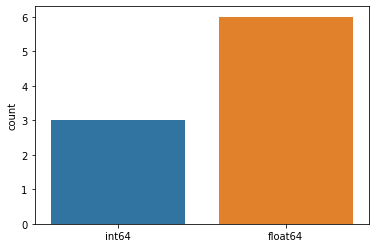

In [40]:
sns.countplot(x=data.dtypes, data=data)

## Plotting the count of outcomes by their value. 

<AxesSubplot:xlabel='Outcome', ylabel='count'>

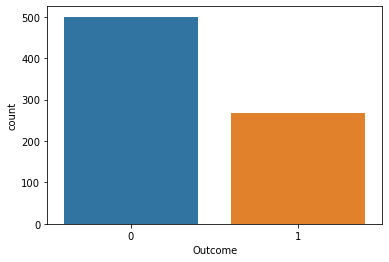

In [41]:
sns.countplot(data.Outcome)

In [42]:
data.Outcome.value_counts(normalize=True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

### It is clear from the above countplot that the classes in Outcome are little biassed and unbalanced. So the Strategy will be balancing the data using SMOTE (Synthetic Minority Oversampling Technique) before fitting the model

### Applying KmeansSMOTE (an oversampling method) for resampling
#### Kmeans Smote creates resamples that will increase the instances of Class 1 (fraud class). Kmeans SMOTE consists of 3 steps- clustering, filtering, and oversampling. However, SMOTE has three disadvantages: (1) it oversamples uninformative samples ; (2) it oversamples noisy samples; and (3) it is difficult to determine the number of nearest neighbors, and there is strong blindness in the selection of nearest neighbors for the synthetic samples Using SMOTE, your model will start detecting more cases of the minority class, which will result in an increased recall, but a decreased precision.

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
Counter(data['Outcome'])

Counter({1: 268, 0: 500})

In [45]:
features = data.drop('Outcome', axis=1)
target = data['Outcome']
print(features.shape, target.shape)

(768, 8) (768,)


In [46]:
features_resampled, target_resampled = SMOTE(random_state=42).fit_resample(features, target)

In [47]:
print(features_resampled.shape, target_resampled.shape)

(1000, 8) (1000,)


In [48]:
data_res = pd.concat([features_resampled, target_resampled], axis=1)

In [49]:
data_res.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1


<AxesSubplot:xlabel='Outcome', ylabel='count'>

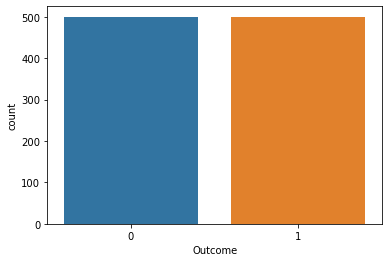

In [50]:
sns.countplot(x ='Outcome', data = data_res)

### The count plot shows clear balanced classes in Outcome after balancing the data with SMOTE.

## Scatter charts between the pair of variables to understand the relationships

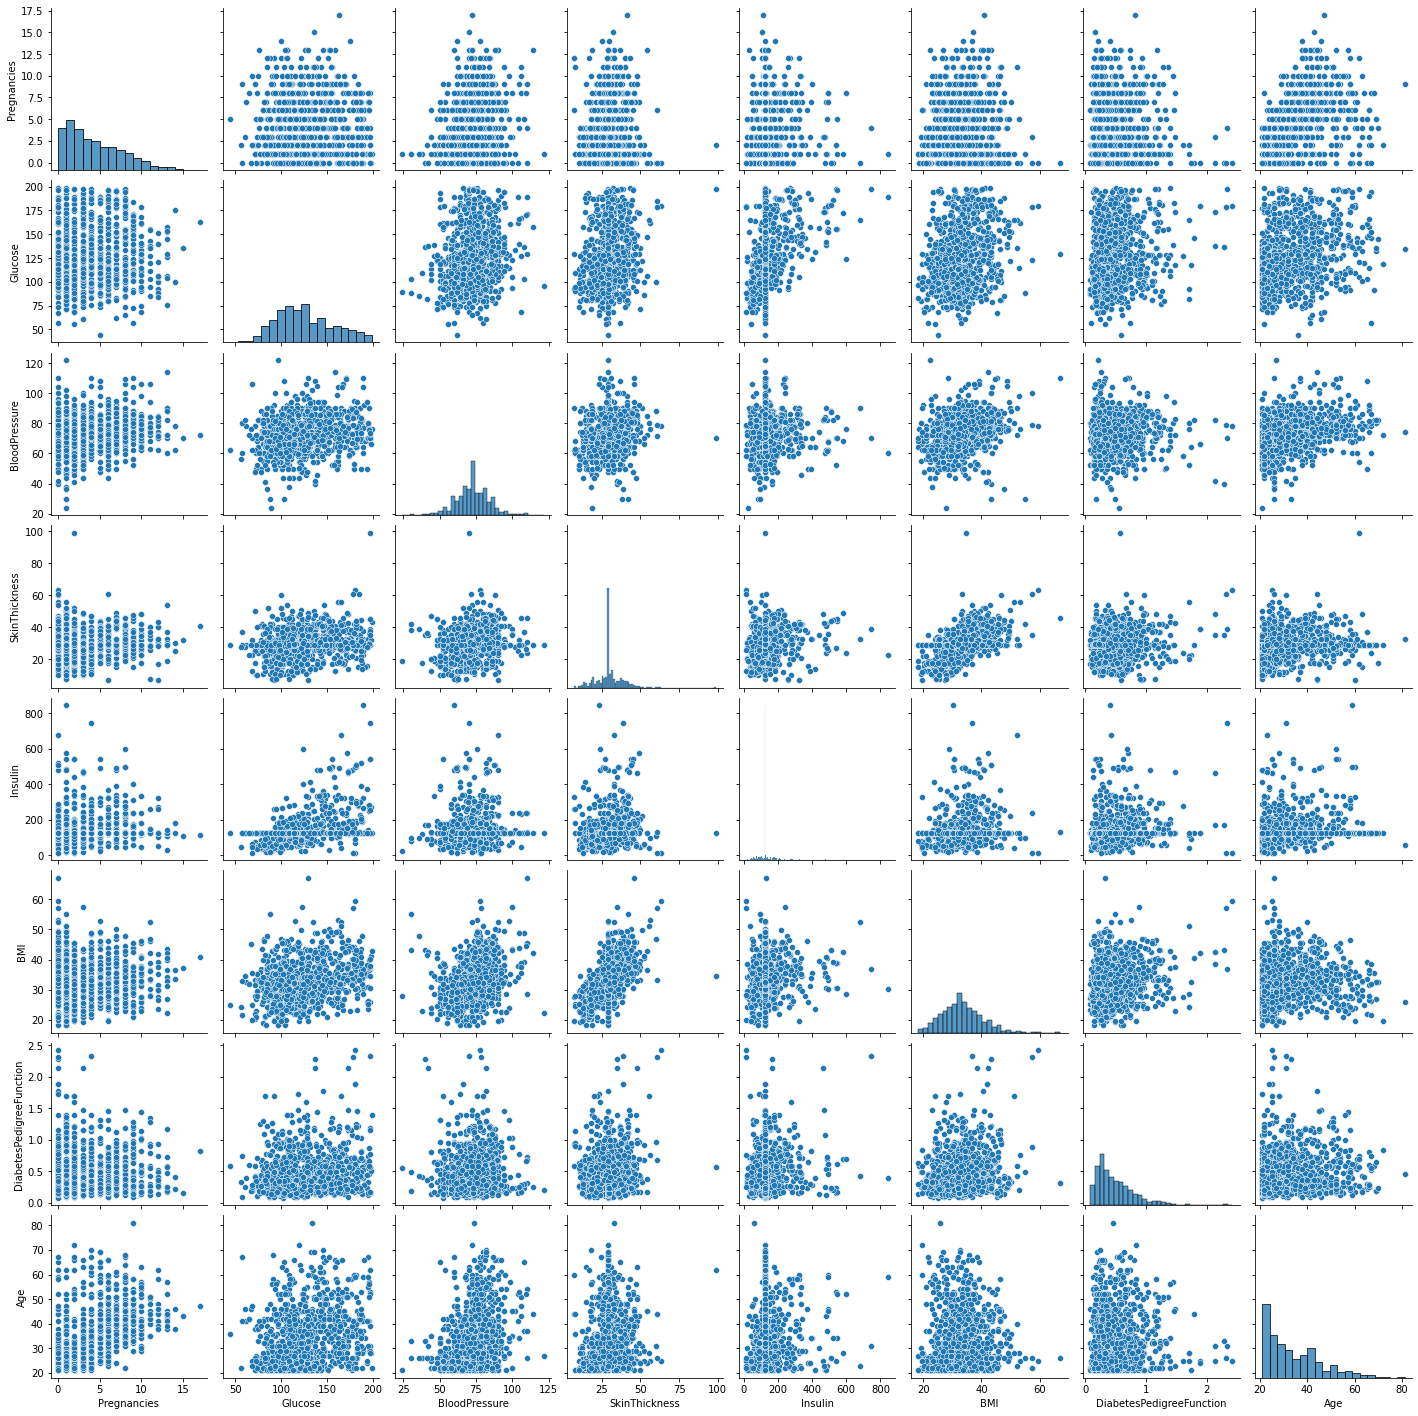

In [51]:
cols= ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

sns.pairplot(data_res[cols])


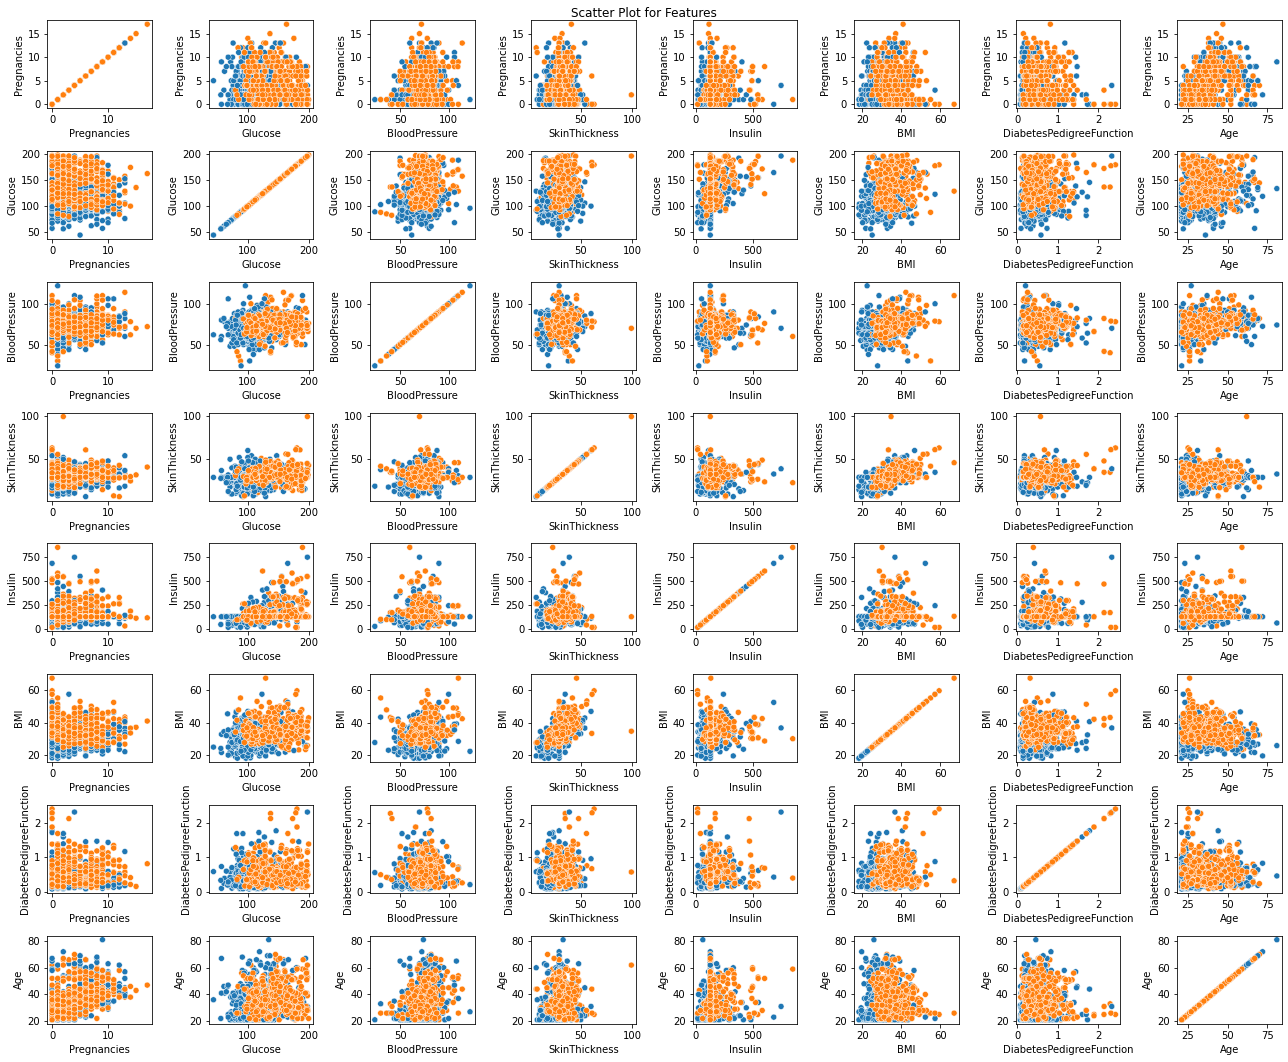

In [52]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(8, 8, figsize=(18, 15))
fig.suptitle('Scatter Plot for Features')

for i, col_y in enumerate(features_resampled.columns):
    for j, col_x in enumerate(features_resampled.columns):             
        sns.scatterplot(ax=axes[i, j], x=col_x, y=col_y, data=data_res, hue="Outcome", legend = False)

plt.tight_layout()

### Describe your findings

#### The above scatter plot shows that variable Glucose clearly distinguishes between the outcome classes followed by BMI.
#### Other variables are not able to clearly distinguish between the outcome classes
#### Further we study the relation between these variables better with correlation analysis.

## Correlation analysis using a heat map

In [53]:
correlation = data_res.corr()

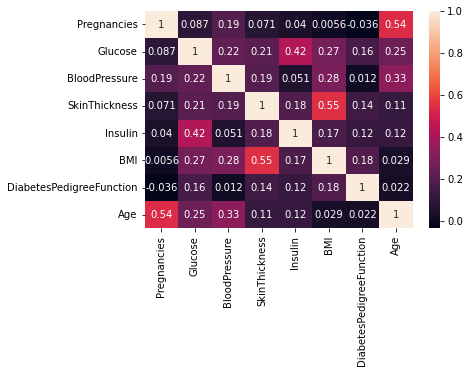

In [54]:
sns.heatmap(features_resampled.corr(), annot = True);

In [55]:
correlation.to_excel('correlation.xlsx')

### The correlation matrix and the heat map shows that there exists some significant correlation between-
### * Age and Pregnancies
### * BMI and SkinThickness
### * Insulin and Glucose

## Data Modeling

### Strategy-
### Since the objective of this study is to predict whether or not a patient has diabetes based on the diagnostic measurements in the dataset. This is a clear example of classification where a class label is predicted. To predict the outcome- positive (1) and negative (0) for diabetes, I will be building different classification algorithms on training dataset and then compare performance of each model on test data to accurately predict target variable (Outcome).

### Right validation framework- divide train test 75:25


In [56]:
#Train test split
X_train,X_test,y_train,y_test = train_test_split(features_resampled,target_resampled,test_size=0.25,random_state =40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(750, 8) (250, 8) (750,) (250,)


In [57]:
y_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: Outcome, dtype: float64

In [58]:
y_test.value_counts(normalize=True)

0    0.5
1    0.5
Name: Outcome, dtype: float64

### The above value counts show that test and train ratio is preserved

### Model comparision list creation

In [59]:
Clf_Models = []
Model_accuracy = []
Model_f1 = []
Model_auc = []

<!--  Scaling is a prerequisite for KNN Algorithm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scalled_X_train = scaler.fir_transform(X_train)
scalled_X_test = scaler.transform(X_test)
Model = KNeighborsClassifier(n_neighbors = 5)
model.fit(scalled_X_tran, y_train)
 model.score(X_train, train_y)
model.score(X_test, test_y)

### Scaling is a prerequisite for KNN Algorithm because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes.

### Scaling the data

In [60]:
from sklearn.preprocessing import StandardScaler 

In [61]:
Scaler = StandardScaler()

In [62]:
X_train_scaled = Scaler.fit_transform(X_train)  
# Scaler.fit(X_train)
# X_train_scaled = Scaler.transform(X_train)  

## 1. K-Nearest Neighbour (KNN) Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [65]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [66]:
KNN_model.score(X_train_scaled, y_train)

0.8493333333333334

In [67]:
KNN_model.score(X_test_scaled, y_test)

0.792

### Performance evaluation and optimizing parameters using GridSearchCV

In [68]:
params = { 'n_neighbors' : [3,5,11,15,18],
         'weights' : ['uniform', 'distance'],
         'metric': ['euclidean', 'manhattan']}

In [69]:
 from sklearn.model_selection import GridSearchCV

In [70]:
Grid_knn = GridSearchCV(estimator=KNN_model, param_grid=params, cv=5, verbose=0, n_jobs =-1)
Grid_knn.fit(features_resampled, target_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 15, 18],
                         'weights': ['uniform', 'distance']})

In [71]:
print("tuned hpyerparameters :(best parameters) ",Grid_knn.best_params_)
print("accuracy :",Grid_knn.best_score_)

tuned hpyerparameters :(best parameters)  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
accuracy : 0.8009999999999999


In [72]:
KNN_model_Grid = KNeighborsClassifier(n_neighbors=5,metric= 'manhattan', weights= 'distance')

In [73]:
KNN_model_Grid.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [74]:
KNN_model_Grid.score(X_train_scaled, y_train)

1.0

In [75]:
KNN_model_Grid.score(X_test_scaled, y_test)

0.776

### Preparing ROC Curve (Receiver Operating Characteristics Curve

AUC: 0.859


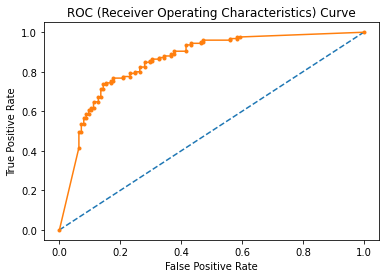

In [76]:
from sklearn.metrics import roc_curve

y_pred_prob = KNN_model_Grid.predict_proba(X_test_scaled)[::,1] # predict probabilities

auc_KNN = roc_auc_score(y_test, y_pred_prob)         # calculate AUC
print('AUC: %.3f' %auc_KNN)

fpr, tpr, _ = roc_curve(y_test,  y_pred_prob) # calculate ROC 

#create ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')    
plt.plot(fpr,tpr, marker='.')  # plot no skill (a horizontal line with a precision)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC (Receiver Operating Characteristics) Curve");
plt.show()

### Precision Recall Curve

f1=0.785 auc_pr=0.853 ap=0.824


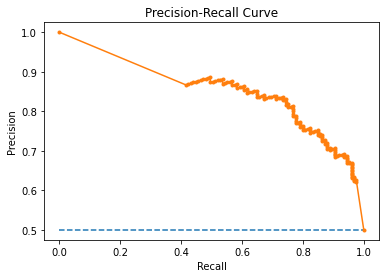

In [77]:
from sklearn.metrics import precision_recall_curve, f1_score, auc, average_precision_score
pred_y_test = KNN_model_Grid.predict(X_test_scaled)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_KNN_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, y_pred_prob)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_KNN_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [78]:
Clf_Models.append('KNN')
Model_accuracy.append(accuracy_score(y_test, pred_y_test))
Model_f1.append(f1)
Model_auc.append(auc_KNN)

## 2. Logistic Regression

In [79]:
#Create model
from sklearn.linear_model import LogisticRegression


In [80]:
LR_model = LogisticRegression(class_weight='balanced')
LR_model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced')

### To correct the above problem, we will consider scaling the data and then run Logistic regression

In [81]:
y_pred_train = LR_model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

# or LR_model.score(X_train, y_train)

0.728

In [82]:
y_pred_test = LR_model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

# or 
# Apply scaling on testing data, without leaking training data
# LR_model.score(X_test, y_test)

0.744

In [83]:
confusion_matrix(y_test,y_pred_test)

array([[99, 26],
       [38, 87]], dtype=int64)

In [84]:
#Evaluating the log_reg_basic_model for train and test data
print('Metrics for LogisticRegression Model on Train Data')
print ('\nAccuracy Score: ', accuracy_score(y_train, y_pred_train))
print ('\n Classification Report:\n', classification_report(y_train, y_pred_train))
print('\n ROC-AUC Score: ', roc_auc_score(y_train, y_pred_train))

print('Metrics for LogisticRegression Model on Test Data')
print ('\nAccuracy Score: ', accuracy_score(y_test, y_pred_test))
print ('\n Classification Report:\n', classification_report(y_test, y_pred_test))
print('\n ROC-AUC Score: ', roc_auc_score(y_test, y_pred_test))

Metrics for LogisticRegression Model on Train Data

Accuracy Score:  0.728

 Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74       375
           1       0.74      0.70      0.72       375

    accuracy                           0.73       750
   macro avg       0.73      0.73      0.73       750
weighted avg       0.73      0.73      0.73       750


 ROC-AUC Score:  0.728
Metrics for LogisticRegression Model on Test Data

Accuracy Score:  0.744

 Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.76       125
           1       0.77      0.70      0.73       125

    accuracy                           0.74       250
   macro avg       0.75      0.74      0.74       250
weighted avg       0.75      0.74      0.74       250


 ROC-AUC Score:  0.744


### Performance evaluation and optimizing parameters using GridSearchCV 

In [85]:
params = {'C':np.logspace(-5, 5, 50)}

In [86]:
Grid_LR = GridSearchCV(LogisticRegression(),
                    param_grid=params,
                    cv=5, verbose=0,
                    refit=False)
Grid_LR.fit(features_resampled, target_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.714866...
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])},
             refit=False)

In [87]:
print("tuned hpyerparameters :(best parameters) ",Grid_LR.best_params_)
print("accuracy :",Grid_LR.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.49417133613238384}
accuracy : 0.7459999999999999


In [88]:
LR_model_Grid = LogisticRegression(C=0.49417133613238384, max_iter=300)

In [89]:
LR_model_Grid.fit(X_train_scaled, y_train)

LogisticRegression(C=0.49417133613238384, max_iter=300)

In [90]:
LR_model_Grid.score(X_train_scaled,y_train)

0.7306666666666667

In [91]:
LR_model_Grid.score(X_test_scaled, y_test)

0.744

### Preparing ROC Curve (Receiver Operating Characteristics Curve)

AUC: 0.866


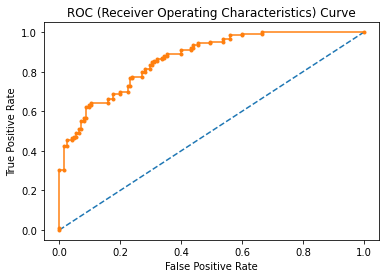

In [92]:

# Define metrics

y_pred_prob = LR_model_Grid.predict_proba(X_test_scaled)[::,1] # predict probability values

auc_LR = roc_auc_score(y_test, y_pred_prob)         # calculate AUC
print('AUC: %.3f' %auc_LR)

fpr, tpr, _ = roc_curve(y_test,  y_pred_prob) # calculate ROC 

#create ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')    
plt.plot(fpr,tpr, marker='.')  # plot no skill (a horizontal line with a precision)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC (Receiver Operating Characteristics) Curve");
plt.show()

### Precision Recall Curve

f1=0.731 auc_pr=0.873 ap=0.873


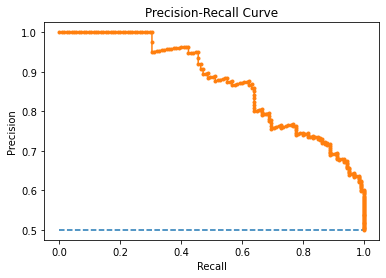

In [93]:

# Precision Recall Curve 

pred_y_test = LR_model_Grid.predict(X_test_scaled)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_LR_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, y_pred_prob)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_LR_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

### Appending the results from LR_model to the Model list

In [94]:
Clf_Models.append('LR')
Model_accuracy.append(accuracy_score(y_test, pred_y_test))
Model_f1.append(f1)
Model_auc.append(auc_LR)

## 3. Decision Tree Classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(max_depth=6)
DT_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=6)

In [96]:
DT_model.score(X_train_scaled,y_train)

0.8746666666666667

In [97]:
DT_model.score(X_test_scaled,y_test)

0.792

### Performance evaluation and optimizing parameters using GridSearchCV

In [98]:
params = {
    'max_depth':[1,2,3,4,5,6,None]
}

In [99]:
Grid_DT = GridSearchCV(DT_model, param_grid = params, cv=5, verbose=0)
Grid_DT.fit(features_resampled, target_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=6),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, None]})

In [100]:
print("tuned hpyerparameters :(best parameters) ",Grid_DT.best_params_)
print("accuracy :",Grid_DT.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 4}
accuracy : 0.77


In [101]:
DT_model_Grid = DecisionTreeClassifier(max_depth=4)

In [102]:
DT_model_Grid.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=4)

In [103]:
DT_model_Grid.score(X_train_scaled,y_train)

0.7853333333333333

In [104]:
DT_model_Grid.score(X_test_scaled, y_test)

0.772

### Preparing ROC curve

AUC: 0.852


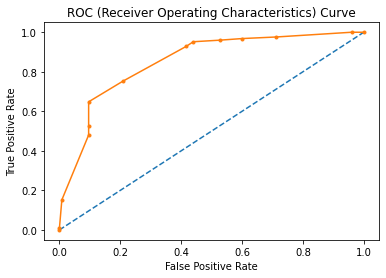

In [105]:
# Define metrics

y_pred_prob = DT_model_Grid.predict_proba(X_test_scaled)[::,1] # predict probabilities

auc_DT = roc_auc_score(y_test, y_pred_prob)         # calculate AUC
print('AUC: %.3f' %auc_DT)

fpr, tpr, _ = roc_curve(y_test,  y_pred_prob) # calculate ROC 

#create ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')    
plt.plot(fpr,tpr, marker='.')  # plot no skill (a horizontal line with a precision)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC (Receiver Operating Characteristics) Curve");
plt.show()

### Precision Recall Curve

f1=0.767 auc_pr=0.845 ap=0.810


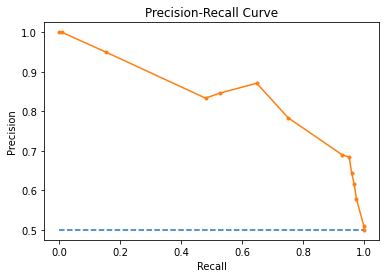

In [106]:

pred_y_test = DT_model_Grid.predict(X_test_scaled)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_DT_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, y_pred_prob)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_DT_pr, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [107]:
Clf_Models.append('DT')
Model_accuracy.append(accuracy_score(y_test, pred_y_test))
Model_f1.append(f1)
Model_auc.append(auc_DT)

## 4. Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(random_state=42) # (n_estimators=500, max_depth=3)
RF_model.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [109]:
RF_model.score(X_train_scaled,y_train)

1.0

In [110]:
RF_model.score(X_test_scaled,y_test)

0.816

### Performance evaluation and optimizing parameters using GridSearchCV

In [111]:
params = {'n_estimators' : [50, 100, 150], 
          'max_depth' : [2, 4, 5, None], 
         'min_samples_leaf': [1,3,5],
         'criterion' :['gini', 'entropy']
         }

In [112]:
Grid_RF = GridSearchCV(estimator=RF_model, param_grid=params, cv= 5)
Grid_RF.fit(features_resampled, target_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, None],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [113]:
print("tuned hpyerparameters :(best parameters) ",Grid_RF.best_params_)
print("accuracy :",Grid_RF.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 150}
accuracy : 0.8320000000000001


In [116]:
RF_model_Grid = RandomForestClassifier(max_depth= None, min_samples_leaf= 1, n_estimators= 150, criterion= 'gini')

In [117]:
RF_model_Grid.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=150)

In [118]:
RF_model_Grid.score(X_train_scaled,y_train)

1.0

In [119]:
RF_model_Grid.score(X_test_scaled,y_test)

0.824

### Preparing ROC Curve (Receiver Operating Characteristics Curve)

AUC: 0.900


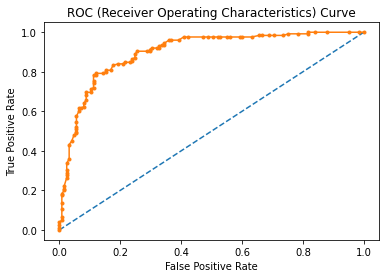

In [120]:
y_pred_prob = RF_model_Grid.predict_proba(X_test_scaled)[::,1] # predict probabilities

auc_RF = roc_auc_score(y_test, y_pred_prob)         # calculate AUC
print('AUC: %.3f' %auc_RF)

fpr, tpr, _ = roc_curve(y_test,  y_pred_prob) # calculate ROC 

#create ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')    
plt.plot(fpr,tpr, marker='.')  # plot no skill (a horizontal line with a precision)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC (Receiver Operating Characteristics) Curve");
plt.show()

### Precision Recall Curve

f1=0.827 auc_pr=0.881 ap=0.881


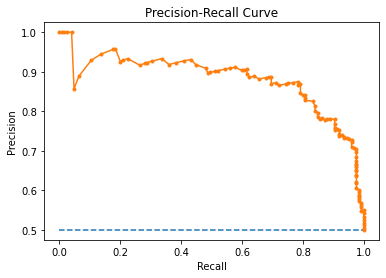

In [121]:
pred_y_test = RF_model_Grid.predict(X_test_scaled)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_RF_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, y_pred_prob)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_RF_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [122]:
Clf_Models.append('RF')
Model_accuracy.append(accuracy_score(y_test, pred_y_test))
Model_f1.append(f1)
Model_auc.append(auc_RF)

## 5. Support Vector Classifier

In [123]:
from sklearn.svm import SVC
SVC_Model = SVC(kernel='rbf')

In [124]:
SVC_Model.fit(X_train_scaled, y_train)

SVC()

In [125]:
SVC_Model.score(X_train_scaled,y_train)

0.848

In [126]:
SVC_Model.score(X_test_scaled,y_test)

0.792

### Performance evaluation and optimizing parameters using GridSearchCV

In [127]:
params = {'C':[1, 5, 10, 15, 20, 25],
    'gamma':[0.001, 0.005, 0.0001, 0.00001]
}

In [128]:
Grid_SVC = GridSearchCV(estimator=SVC_Model, param_grid=params, cv=5, verbose=0)
Grid_SVC.fit(features_resampled, target_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25],
                         'gamma': [0.001, 0.005, 0.0001, 1e-05]})

In [129]:
print("tuned hpyerparameters :(best parameters) ",Grid_SVC.best_params_)
print("accuracy :",Grid_SVC.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 25, 'gamma': 0.005}
accuracy : 0.8140000000000001


In [130]:
SVC_Model_Grid = SVC(kernel='rbf', C=25, gamma=0.005, probability=True)

In [131]:
SVC_Model_Grid.fit(X_train_scaled, y_train)

SVC(C=25, gamma=0.005, probability=True)

In [132]:
SVC_Model_Grid.score(X_train_scaled, y_train)

0.7813333333333333

In [133]:
SVC_Model_Grid.score(X_test_scaled, y_test)

0.796

### Preparing ROC Curve (Receiver Operating Characteristics Curve)

AUC: 0.880


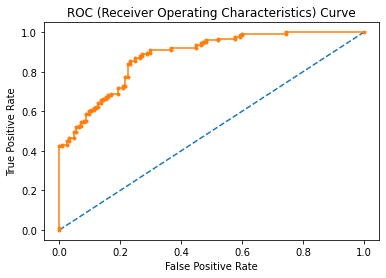

In [134]:
y_pred_prob = SVC_Model_Grid.predict_proba(X_test_scaled)[::,1] # predict probabilities

auc_SVC = roc_auc_score(y_test, y_pred_prob)         # calculate AUC
print('AUC: %.3f' %auc_SVC)

fpr, tpr, _ = roc_curve(y_test,  y_pred_prob) # calculate ROC 

#create ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')    
plt.plot(fpr,tpr, marker='.')  # plot no skill (a horizontal line with a precision)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC (Receiver Operating Characteristics) Curve");
plt.show()

### Precision Recall Curve

f1=0.800 auc_pr=0.887 ap=0.887


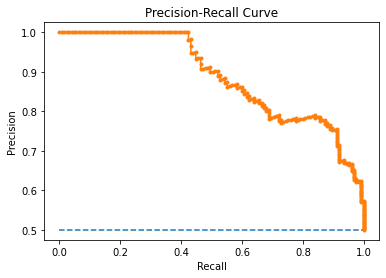

In [135]:
pred_y_test = SVC_Model_Grid.predict(X_test_scaled)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_SVC_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, y_pred_prob)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_SVC_pr, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [136]:
Clf_Models.append('SVC')
Model_accuracy.append(accuracy_score(y_test, pred_y_test))
Model_f1.append(f1)
Model_auc.append(auc_SVC)

## 6. Ensemble learning algorithms- 

### a. Adaptive Boosting (AdaBoost)

In [137]:
from sklearn.ensemble import AdaBoostClassifier

Ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators= 100)

In [138]:
Ada_clf.fit(X_train_scaled, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [139]:
Ada_clf.score(X_train_scaled, y_train)

1.0

In [140]:
Ada_clf.score(X_test_scaled, y_test)

0.76

### Preparing ROC Curve (Receiver Operating Characteristics Curve

AUC: 0.760


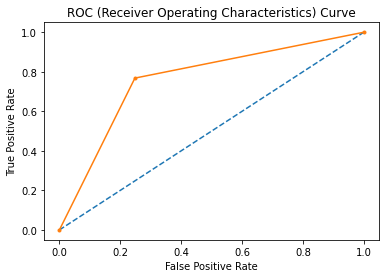

In [141]:
y_pred_prob = Ada_clf.predict_proba(X_test_scaled)[::,1] # predict probabilities

auc_AdaB = roc_auc_score(y_test, y_pred_prob)         # calculate AUC
print('AUC: %.3f' %auc_AdaB)

fpr, tpr, _ = roc_curve(y_test,  y_pred_prob) # calculate ROC 

#create ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')    
plt.plot(fpr,tpr, marker='.')  # plot no skill (a horizontal line with a precision)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC (Receiver Operating Characteristics) Curve");
plt.show()

### Precision Recall Curve 

f1=0.762 auc_pr=0.820 ap=0.697


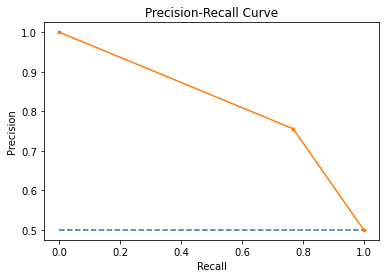

In [142]:
pred_y_test = Ada_clf.predict(X_test_scaled)                                    # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_AdaB_pr = auc(recall, precision)                                   # calculate precision-recall AUC
ap = average_precision_score(y_test, y_pred_prob)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_AdaB_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [143]:
Clf_Models.append('AdaB')
Model_accuracy.append(accuracy_score(y_test, pred_y_test))
Model_f1.append(f1)
Model_auc.append(auc_AdaB)

### b. Gradient Boosting (XGBClassifier)

In [144]:
from sklearn.ensemble import GradientBoostingClassifier

In [145]:
XGB_clf = GradientBoostingClassifier()

In [146]:
XGB_clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [147]:
XGB_clf.score(X_train_scaled, y_train)

0.928

In [148]:
XGB_clf.score(X_test_scaled, y_test)

0.836

### Performance evaluation and optimizing parameters using GridSearchCV

In [149]:
params = {'n_estimators' : [10, 80, 100, 120],
          'learning_rate' : [0.1, 0.3, 1.0],
          'subsample' :  [0.7, 0.8, 0.9],
          'max_depth': [2,5,7,10,15]
}

In [150]:
Grid_XGB_clf = GridSearchCV(XGB_clf, param_grid= params, scoring = 'roc_auc', n_jobs = 10, cv=5, verbose=0)

In [151]:
Grid_XGB_clf.fit(features_resampled, target_resampled)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.3, 1.0],
                         'max_depth': [2, 5, 7, 10, 15],
                         'n_estimators': [10, 80, 100, 120],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='roc_auc')

In [152]:
print("tuned hpyerparameters :(best parameters) ",Grid_XGB_clf.best_params_)
print("accuracy :",Grid_XGB_clf.best_score_)

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 120, 'subsample': 0.8}
accuracy : 0.9102


In [153]:
XGB_model_Grid = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 15, n_estimators= 120, subsample= 0.8)

In [154]:
XGB_model_Grid.fit(X_train_scaled, y_train)

GradientBoostingClassifier(max_depth=15, n_estimators=120, subsample=0.8)

In [155]:
XGB_model_Grid.score(X_train_scaled,y_train)

1.0

In [156]:
XGB_model_Grid.score(X_test_scaled, y_test)

0.812

### Preparing ROC Curve (Receiver Operating Characteristics Curve

AUC: 0.898


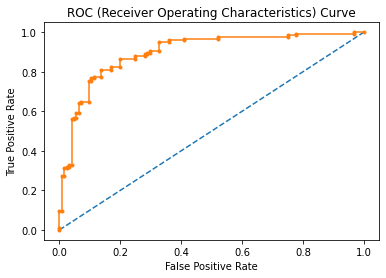

In [157]:
y_pred_prob = XGB_model_Grid.predict_proba(X_test_scaled)[::,1] # predict probabilities

auc_XGB = roc_auc_score(y_test, y_pred_prob)         # calculate AUC
print('AUC: %.3f' %auc_XGB)

fpr, tpr, _ = roc_curve(y_test,  y_pred_prob) # calculate ROC 

#create ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')    
plt.plot(fpr,tpr, marker='.')  # plot no skill (a horizontal line with a precision)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC (Receiver Operating Characteristics) Curve");
plt.show()

### Precision Recall Curve

f1=0.814 auc_pr=0.890 ap=0.891


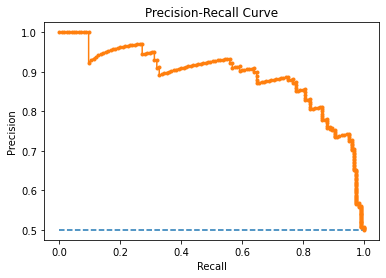

In [158]:
pred_y_test = XGB_model_Grid.predict(X_test_scaled)                                    # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_XGB_pr = auc(recall, precision)                                   # calculate precision-recall AUC
ap = average_precision_score(y_test, y_pred_prob)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_XGB_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [159]:
Clf_Models.append('XGB')
Model_accuracy.append(accuracy_score(y_test, pred_y_test))
Model_f1.append(f1)
Model_auc.append(auc_XGB)

## Comparing all the Classification Algorithms based on Accuracy, F1_score and Auc

In [160]:
Clf_Model_summary = pd.DataFrame(zip(Clf_Models,Model_accuracy,Model_f1,Model_auc), columns = ['Clf_Model','accuracy','f1_score','auc'])
Clf_Model_summary = Clf_Model_summary.set_index('Clf_Model')
Clf_Model_summary

,accuracy,f1_score,auc
Clf_Model,,,
KNN,0.776,0.784615,0.858592
LR,0.744,0.731092,0.866176
DT,0.772,0.767347,0.851552
RF,0.824,0.826772,0.899680
SVC,0.796,0.800000,0.880384
AdaB,0.760,0.761905,0.760000
XGB,0.812,0.814229,0.898368


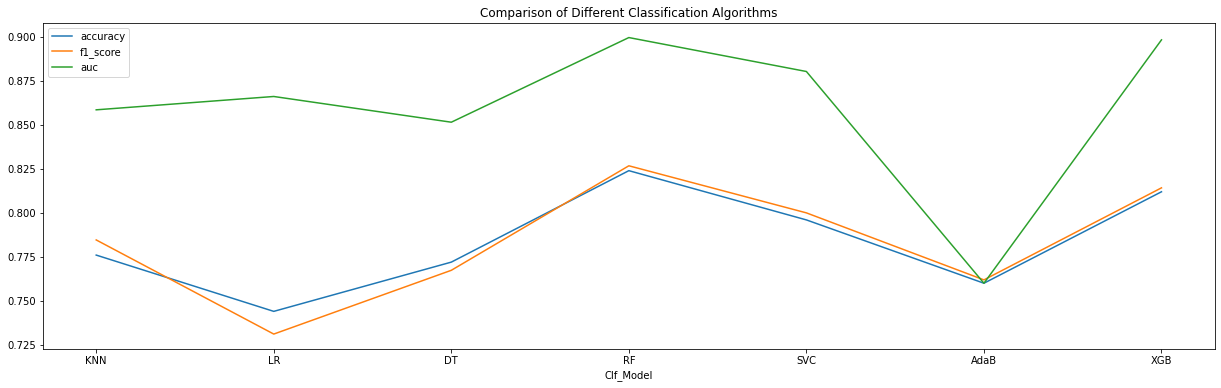

In [161]:
Clf_Model_summary.plot(figsize=(21,6))
plt.title("Comparison of Different Classification Algorithms");

### According to the plot based on Accuracy, F1 score and AUC, XGBoost and Random Forest (RF) outperformed all the classification models. XGB and RF showed very similar performance. So to confirm the best model out of two, we will further study the classification report of XGB and RF.

## Classification report - analyzing sensitivity, specificity, AUC (ROC curve)

In [162]:
Class_Report_XGB = classification_report(y_test,XGB_model_Grid.predict(X_test_scaled))
print(Class_Report_XGB)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       125
           1       0.80      0.82      0.81       125

    accuracy                           0.81       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.81      0.81      0.81       250



In [163]:
Class_Report_RF = classification_report(y_test, RF_model_Grid.predict(X_test_scaled))
print(Class_Report_RF)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       125
           1       0.81      0.84      0.83       125

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



### RF model gave better precison and recall than XGBoost model for both classes 0 (not diabetic) and 1 (diabetic). For further clarity, F1 score was compared between 2 models. F1 score for both models is close to 1 so both models did perform good. The F1 score showed that RF gave better performance for both classes- 0 (non-diabetic) and 1 (diabetic) Therefore, RF classifier is selected as the best model based upon the classifcation report for this problem.

In [164]:
Best_Classifier = RF_model_Grid

In [165]:
CM_RF = confusion_matrix(y_test, RF_model_Grid.predict(X_test_scaled))
CM_RF

array([[101,  24],
       [ 20, 105]], dtype=int64)

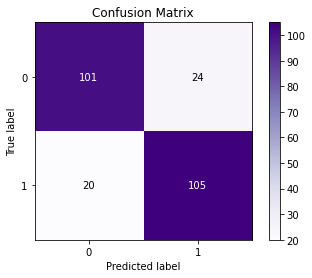

In [166]:
# ! pip install scikit-plot
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, Best_Classifier.predict(X_test_scaled),
                                    normalize=False,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    );

In [167]:
# True Positive 
TP1 = CM_RF[1,1] 
# True Negatives
TN1 = CM_RF[0,0] 
# False Positives
FP1 = CM_RF[0,1] 
# False Negatives
FN1 = CM_RF[1,0] 

Accuracy = (TP1+TN1)/(TP1+TN1+FP1+FN1)
Precision = TP1/(TP1+FP1)
Sensitivity = TP1/(TP1+FN1)                     # also called recall
Specificity = TN1/(TN1+FP1)
print("Accuracy of RF: %.3f"%Accuracy)
print("Precision of RF: %.3f"%Precision)
print("Sensitivity/Recall of RF: %.3f"%Sensitivity)
print("Specificity of RF : %.3f"%Specificity)
print("AUC RF: %.3f"%auc_RF)

Accuracy of RF: 0.824
Precision of RF: 0.814
Sensitivity/Recall of RF: 0.840
Specificity of RF : 0.808
AUC RF: 0.900


In [168]:
CM_XGB = confusion_matrix(y_test, XGB_model_Grid.predict(X_test_scaled))
CM_XGB

array([[100,  25],
       [ 22, 103]], dtype=int64)

In [169]:
TP2 = CM_XGB[1,1] 
TN2 = CM_XGB[0,0] 
FP2 = CM_XGB[0,1] 
FN2 = CM_XGB[1,0] 

Accuracy = (TP2+TN2)/(TP2+TN2+FP2+FN2)
Precision = TP2/(TP2+FP2)
Sensitivity = TP2/(TP2+FN2)                     # also called recall
Specificity = TN2/(TN2+FP2)
print("Accuracy of XGB: %.3f"%Accuracy)
print("Precision of XGB: %.3f"%Precision)
print("Sensitivity/ Recall of XGB: %.3f"%Sensitivity)
print("Specificity of XGB : %.3f"%Specificity)
print("AUC XGB: %.3f"%auc_XGB)

Accuracy of XGB: 0.812
Precision of XGB: 0.805
Sensitivity/ Recall of XGB: 0.824
Specificity of XGB : 0.800
AUC XGB: 0.898


####  Precision, Recall and specificity for RF model is better than XGB model. In this study, since we are building a model for disease detection, we need to strictly minimize the number of False Negative. Therefore, we need maximum sensitivity in our model and based on this criteria we can choose RF model as the best model. RF model is performing better than XGB model in all aspects. Accuracy for RF (0.824) is also better than XGBoost(0.812). 
### Conclusion- RF is the best model for predicting the classes for this study.